In [17]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from PIL import Image

In [7]:
df = pd.read_csv('datasets/cat_dog/train.csv')
df.head()

,image:FILE,category
0,train/cat/Sphynx_159_jpg.rf.022528b23ac690c34a...,0
1,train/cat/Persian_139_jpg.rf.0e67f7e0a76dc49d0...,0
2,train/cat/Bengal_150_jpg.rf.05c93a40014062c5ae...,0
3,train/cat/Bombay_140_jpg.rf.15757f698af74453f3...,0
4,train/cat/Persian_128_jpg.rf.16da80c477d1ca2bc...,0


In [8]:
df = df.rename(columns={"image:FILE":"image" })
df2 = df

def add_prefix(path):
    prefix = 'datasets/cat_dog/'
    return prefix + path


# Aplicando a função à coluna "imagem" do DataFrame
df2['image'] = df2['image'].apply( add_prefix )

# Exibindo o DataFrame resultante
print(df['image'])

0      datasets/cat_dog/train/cat/Sphynx_159_jpg.rf.0...
1      datasets/cat_dog/train/cat/Persian_139_jpg.rf....
2      datasets/cat_dog/train/cat/Bengal_150_jpg.rf.0...
3      datasets/cat_dog/train/cat/Bombay_140_jpg.rf.1...
4      datasets/cat_dog/train/cat/Persian_128_jpg.rf....
                             ...                        
270    datasets/cat_dog/train/dog/scottish_terrier_12...
271    datasets/cat_dog/train/dog/samoyed_149_jpg.rf....
272    datasets/cat_dog/train/dog/english_setter_172_...
273    datasets/cat_dog/train/dog/shiba_inu_135_jpg.r...
274    datasets/cat_dog/train/dog/wheaten_terrier_141...
Name: image, Length: 275, dtype: object


In [3]:
df.head()

,image,category
0,datasets/cat_dog/train/cat/Sphynx_159_jpg.rf.0...,0
1,datasets/cat_dog/train/cat/Persian_139_jpg.rf....,0
2,datasets/cat_dog/train/cat/Bengal_150_jpg.rf.0...,0
3,datasets/cat_dog/train/cat/Bombay_140_jpg.rf.1...,0
4,datasets/cat_dog/train/cat/Persian_128_jpg.rf....,0


In [4]:
df['category'].unique()

array([0, 1])

In [5]:
def load_images(paths):
    images = []
    for path in paths:
        image = plt.imread(path)
        
        # Certifique-se de redimensionar as imagens para o tamanho desejado, se necessário
        # imagem = cv2.resize(imagem, (largura_desejada, altura_desejada))

        # plt.imgshow(image)
        plt.show()
    return images

In [25]:
X = (df2['image'])
print(X)

0      datasets/cat_dog/train/cat/Sphynx_159_jpg.rf.0...
1      datasets/cat_dog/train/cat/Persian_139_jpg.rf....
2      datasets/cat_dog/train/cat/Bengal_150_jpg.rf.0...
3      datasets/cat_dog/train/cat/Bombay_140_jpg.rf.1...
4      datasets/cat_dog/train/cat/Persian_128_jpg.rf....
                             ...                        
270    datasets/cat_dog/train/dog/scottish_terrier_12...
271    datasets/cat_dog/train/dog/samoyed_149_jpg.rf....
272    datasets/cat_dog/train/dog/english_setter_172_...
273    datasets/cat_dog/train/dog/shiba_inu_135_jpg.r...
274    datasets/cat_dog/train/dog/wheaten_terrier_141...
Name: image, Length: 275, dtype: object


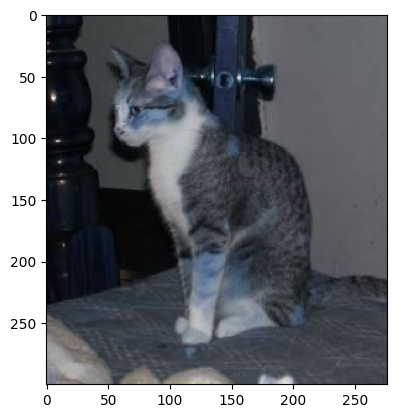

In [13]:
image = cv2.imread(X[20])
plt.imshow(image)
plt.show()

In [35]:
images = []

for path in df2['image']:
    img = Image.open(path).convert('L')  # Converta para escala de cinza
    img = img.resize(target_size)        # Redimensione a imagem
    img_array = np.array(img).flatten()  # Converta em array e aplane
    images.append(img_array)

X = np.array(images)
y = df2['category']

# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crie e treine o perceptron
clf = Perceptron(max_iter=10000, random_state=42)
clf.fit(X_train, y_train)

# Faça previsões
y_pred = clf.predict(X_test)

# Avalie a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy * 100:.2f}%')

Acurácia do modelo: 52.73%


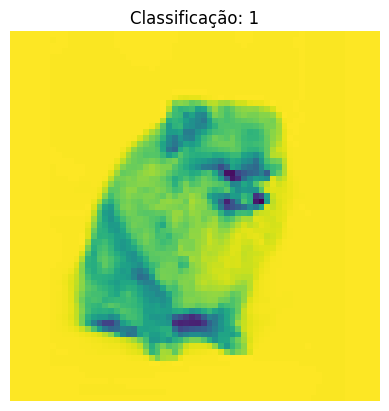

Resultado da previsão: [1]


In [40]:
def show_image_and_predict(model, image_path, target_size=(64, 64)):
    """
    Exibe uma imagem e mostra o resultado da classificação.

    Parameters:
    - model: Modelo treinado (por exemplo, um objeto Perceptron).
    - image_path (str): Caminho para a imagem a ser classificada.
    - target_size (tuple): Tamanho desejado da imagem após o redimensionamento.

    Returns:
    - prediction: Saída da previsão do modelo.
    """
    # Carregue e pré-processa a imagem
    img = Image.open(image_path).convert('L')  # Converta para escala de cinza
    img = img.resize(target_size)              # Redimensione a imagem
    img_array = np.array(img).flatten()        # Converta em array e aplane

    # Faça a previsão usando o modelo
    prediction = model.predict([img_array])

    # Exiba a imagem
    plt.imshow(np.array(img))
    plt.title(f'Classificação: {prediction[0]}')
    plt.axis('off')
    plt.show()

    return prediction

# Exemplo de uso:
# Certifique-se de substituir 'seu_modelo' pelo objeto do modelo treinado.
# Substitua 'caminho_para_sua_imagem.jpg' pelo caminho da imagem que você deseja testar.
# Certifique-se de adaptar o caminho e o nome do modelo conforme necessário.
modelo_treinado = clf  # Substitua 'seu_modelo' pelo objeto do modelo treinado.
caminho_imagem_teste = 'images/cachorro.jpg'  # Substitua pelo caminho da sua imagem.

resultado = show_image_and_predict(modelo_treinado, caminho_imagem_teste)
print(f"Resultado da previsão: {resultado}")